<a href="https://colab.research.google.com/github/rama96/digits_classifier/blob/master/digits_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.4MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 1.2MB 39.2MB/s 
     |████████████████████████████████| 194kB 58.6MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *


Untaring the MNIST data and storing the path as BasePath of the path variable

In [50]:
path = untar_data(URLs.MNIST)
#hide
Path.BASE_PATH = path
path.ls()

(#2) [Path('testing'),Path('training')]

In [52]:
get_image_files(path)

(#70000) [Path('testing/3/9604.png'),Path('testing/3/1354.png'),Path('testing/3/5382.png'),Path('testing/3/5245.png'),Path('testing/3/5224.png'),Path('testing/3/7714.png'),Path('testing/3/2776.png'),Path('testing/3/4509.png'),Path('testing/3/4996.png'),Path('testing/3/3944.png')...]

As shown above , the files are stored in the following manner  

Level 1

> testing / training 


---

Level 2

> 0 / 1 / ......9


---

Level 3 

> images - xxxx.png





Opening a random image to see if everything is working fine.

In [53]:
ones = (path/'training'/'1').ls().sorted()
im1_path = ones[0]
im1 = Image.open(im1_path)
im1

Initializing DataBlock by specifying the format of Input .

Note: Since the training and testing data are already present in different folders , it's best to specify them in the DataBlock through splitter : `GrandparentSplitter(train_name='training', valid_name='testing')`

In [24]:
db = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
        get_y=parent_label,
        item_tfms=Resize(128))

In [26]:
dls = db.dataloaders(path)


In [22]:
#path.ls()
(path/'testing').ls()

(#10) [Path('testing/3'),Path('testing/4'),Path('testing/9'),Path('testing/8'),Path('testing/2'),Path('testing/0'),Path('testing/6'),Path('testing/5'),Path('testing/7'),Path('testing/1')]

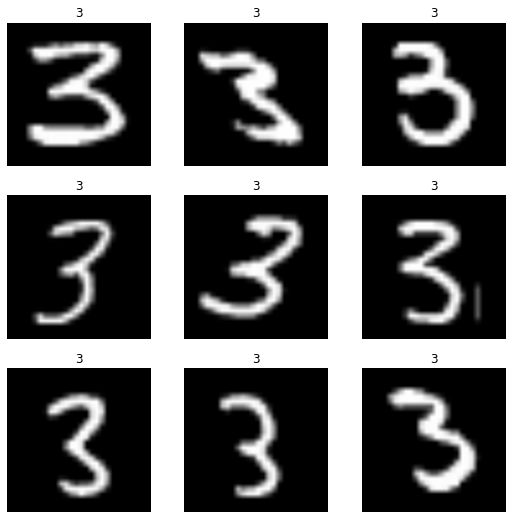

In [28]:
dls.valid.show_batch()

In [29]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [30]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fit_one_cycle(2,0.05)

epoch,train_loss,valid_loss,error_rate,time
0,0.298329,0.339852,0.041600,01:52
1,0.045450,0.026868,0.007800,01:52


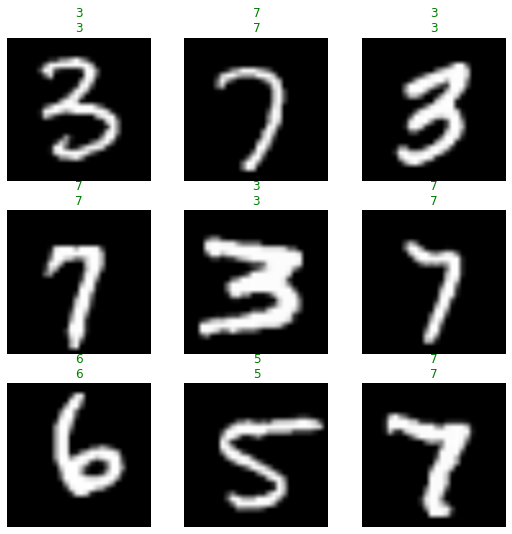

In [31]:
learn.show_results()

In [32]:
interp = Interpretation.from_learner(learn)

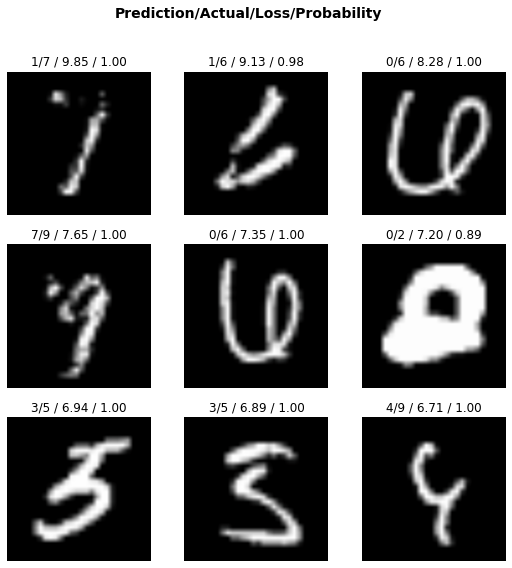

In [33]:
interp.plot_top_losses(9)


In [35]:
interp = ClassificationInterpretation.from_learner(learn)


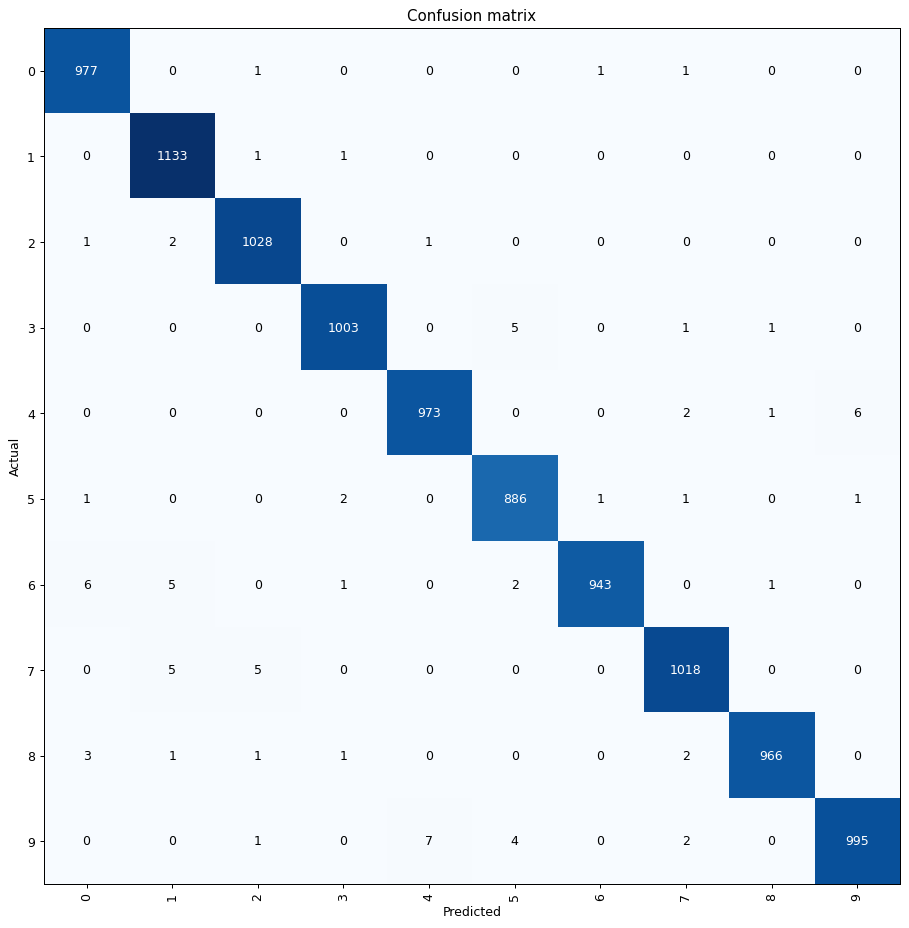

In [36]:
interp.plot_confusion_matrix(figsize=(10,15),cmap='Blues',dpi = 90)

In [38]:
colab_path = Path()
model_path = (colab_path/'gdrive'/'MyDrive'/'models')

In [39]:
learn.export(model_path/"digits_classifier_model.pkl")

In [40]:
learn_inf = load_learner(model_path/'digits_classifier_model.pkl')

Testing the model on a single image .

In [43]:
img_path = (path/'testing'/'3'/'9604.png')
pred , pred_idx , probs = learn_inf.predict(img_path)
pred , pred_idx , probs

('3',
 tensor(3),
 tensor([5.7395e-20, 2.1239e-16, 2.4546e-20, 1.0000e+00, 3.4475e-21, 1.5792e-15, 4.2412e-21, 5.4731e-18, 5.7404e-18, 2.1386e-16]))

In [ ]:
# preds = []
# preds_idx = []
# prob_values = []
# im_paths = []

# for i in list_of_images[0:5]:
#   pred , pred_idx , probs = learn_inf.predict(i)
#   print(probs,type(probs))
#   preds.append(pred)
#   preds_idx.append(pred_idx)
#   prob_values.append(probs)
#   im_paths.append(i)


tensor([6.0016e-16, 5.0337e-13, 6.3952e-14, 1.0000e+00, 1.3839e-16, 7.5671e-13, 8.7530e-17, 4.9421e-15, 3.0289e-13, 7.6635e-14]) <class 'torch.Tensor'>


tensor([5.2952e-12, 2.6491e-09, 5.2996e-09, 1.0000e+00, 6.1578e-12, 3.1540e-08, 2.1976e-11, 7.3852e-09, 1.9650e-08, 2.1458e-09]) <class 'torch.Tensor'>


tensor([3.7792e-12, 2.2993e-11, 5.8034e-11, 1.0000e+00, 3.1809e-13, 5.5944e-09, 3.3408e-12, 6.8294e-11, 2.4742e-10, 2.2940e-11]) <class 'torch.Tensor'>


tensor([7.3777e-14, 8.7546e-13, 2.3260e-12, 1.0000e+00, 4.8695e-14, 2.0452e-09, 7.2193e-14, 6.5183e-12, 3.5936e-11, 1.8841e-11]) <class 'torch.Tensor'>


tensor([2.6719e-13, 4.2668e-12, 1.1263e-11, 1.0000e+00, 3.3249e-13, 1.8977e-08, 1.0650e-12, 2.4017e-12, 3.3543e-10, 2.0441e-10]) <class 'torch.Tensor'>


In [ ]:
# prob_values_tensor = torch.stack(prob_values).float()

In [ ]:
# type(prob_values[1])

torch.Tensor

In [ ]:
# im_paths

[Path('testing/3/9604.png'),
 Path('testing/3/1354.png'),
 Path('testing/3/5382.png'),
 Path('testing/3/5245.png'),
 Path('testing/3/5224.png')]

In [ ]:
# test_files = get_image_files(testing_path)
# test_dl = learn.dls.test_dl(test_files, with_label=True)


In [44]:
# get Predictions for validation / test_set
pred_probas, _, pred_classes = learn.get_preds(dl=dls.valid, with_decoded=True) 